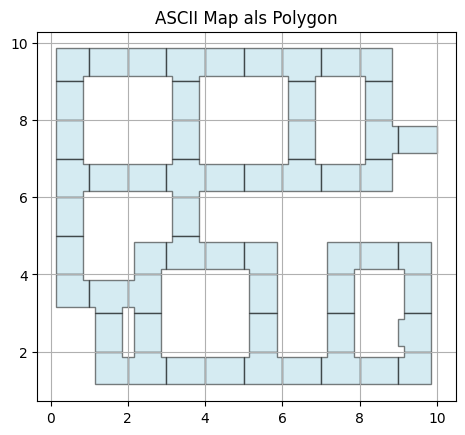

In [ ]:
from shapely.geometry import Polygon
from shapely.ops import unary_union
import matplotlib.pyplot as plt

# Deine ASCII-Map als Grid
grid = [
    ['┌', '─', '─', '┬', '─', '─', '┬', '─', '┐', ' '],
    ['│', ' ', ' ', '│', ' ', ' ', '│', ' ', '│', ' '],
    ['│', ' ', ' ', '│', ' ', ' ', '│', ' ', '│', ''],
    ['├', '─', '─', '┼', '─', '─', '┴', '─', '┘', ' '],
    ['│', ' ', ' ', '│', ' ', ' ', ' ', ' ', ' ', ' '],
    ['│', ' ', '┌', '┴', '─', '┐', ' ', '┌', '─', '┐'],
    ['└', '┬', '┤', ' ', ' ', '│', ' ', '│', ' ', '│'],
    [' ', '│', '│', ' ', ' ', '│', ' ', '│', ' ', '│'],
    [' ', '└', '┴', '─', '─', '┴', '─', '┴', '─', '┘'],
    [' ', '', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
]
cell_size = 1.0
margin = 0.15  # halbe Straßenbreite

def symbol_to_polygon(i, j, symbol, rows, cols, cell_size=1.0, m=0.1):
    x0 = j * cell_size
    y0 = (rows - 1 - i) * cell_size
    x1 = x0 + cell_size
    y1 = y0 + cell_size
    xm = x0 + m
    xM = x1 - m
    ym = y0 + m
    yM = y1 - m

    if symbol == '─':
        return Polygon([(x0, ym), (x1, ym), (x1, yM), (x0, yM)])
    elif symbol == '│':
        return Polygon([(xm, y0), (xM, y0), (xM, y1), (xm, y1)])
    elif symbol == '┌':
        return Polygon([(xm, y0), (xM, y0), (xM, ym), (x1, ym), (x1, yM), (xm, yM)])
    elif symbol == '┐':
        return Polygon([(x0, yM), (xM, yM), (xM, y0), (xm, y0), (xm, ym), (x0, ym)])
    elif symbol == '└':
        return Polygon([(xm, y1), (xm, ym), (x1, ym), (x1, yM), (xM , yM), (xM, y1)])
    elif symbol == '┘':
        return Polygon([(x0, ym), (xM, ym), (xM, y1), (xm, y1), (xm, yM), (x0, yM)])
    elif symbol == '├':
        return Polygon([(xm, y0), (xM, y0), (xM, ym), (x1, ym), (x1, yM), (xM, yM), (xM, y1), (xm, y1)])
    elif symbol == '┤':
        return Polygon([(xm, y0), (xM, y0), (xM, y1), (xm, y1), (xm, yM), (x0, yM), (x0, ym), (xm, ym)])
    elif symbol == '┬':
        return Polygon([(x0, ym), (xm, ym), (xm, y0), (xM, y0), (xM, ym), (x1, ym), (x1, yM), (x0, yM)])
    elif symbol == '┴':
        return Polygon([(x0, ym), (x1, ym), (x1, yM), (xM, yM), (xM, y1), (xm, y1), (xm, yM), (x0, yM)])
    elif symbol == '┼':
        return Polygon([(xm, y0), (xM, y0), (xM, ym), (x1, ym), (x1, yM), (xM, yM), (xM, y1),
                        (xm, y1), (xm, yM), (x0, yM), (x0, ym), (xm, ym)])
    return None

def ascii_grid_to_polygons(grid, cell_size=1.0, margin=0.1):
    rows = len(grid)
    cols = len(grid[0])
    polygons = []
    for i in range(rows):
        for j in range(cols):
            symbol = grid[i][j]
            poly = symbol_to_polygon(i, j, symbol, rows, cols, cell_size, margin)
            if poly:
                polygons.append(poly)
    return polygons

def plot_polygons(polygons):
    fig, ax = plt.subplots()
    for poly in polygons:
        x, y = poly.exterior.xy
        ax.fill(x, y, alpha=0.5, fc='lightblue', ec='black')
    ax.set_aspect('equal')
    ax.set_title("ASCII Map als Polygon")
    plt.grid(True)
    plt.show()

# Main-Ausführung
polys = ascii_grid_to_polygons(grid, cell_size, margin)
plot_polygons(polys)